This course part is focused on learning Time Series

So we need that pandas is maybe the best library to work with data and this type of thing to do with it

In [122]:
import pandas as pd

In [123]:
BirthsFem = pd.read_csv("D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/7. ST Academy - Time Series resource files/daily-total-female-births-CA.csv", header = 0)
BirthsFem.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [124]:
BirthsFem["date"].dtype

dtype('O')

In [125]:
BF = pd.read_csv("D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/7. ST Academy - Time Series resource files/daily-total-female-births-CA.csv", header = 0, parse_dates =[0])
BF.head()
#This variable, represent the same data, but it make a transformation data to string by variable parse important to date type columns

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [126]:
BF["date"].dtype

dtype('<M8[ns]')

In [127]:
series = pd.read_csv("D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/7. ST Academy - Time Series resource files/daily-total-female-births-CA.csv", header = 0, parse_dates =[0], index_col = 0, squeeze = True)
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [128]:
print(series.shape, "vs", BF.shape)

(365,) vs (365, 2)


In [129]:
#making some queries about series data
print(series["1959-01"])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [130]:
BF[(BF["date"] > "1959-01-01") & (BF["date"]<="1959-01-21")] 

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


In [131]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [132]:
BF.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


Now we want see how visualize our times series data through Matplotlib

In [133]:
from matplotlib import pyplot as plt
%matplotlib inline

In [134]:
D_df = BF.copy()
D_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


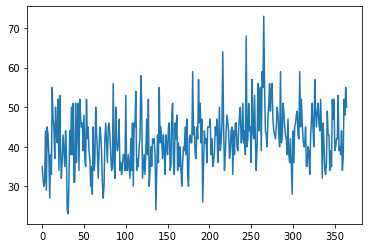

In [135]:
D_df["births"].plot()

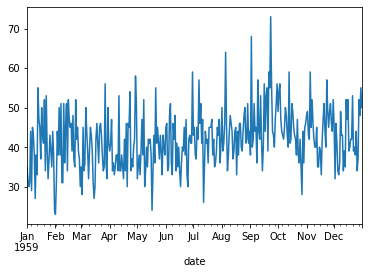

In [136]:
D_df.index = D_df["date"]
D_df["births"].plot()

In [137]:
D_df2 = D_df[(D_df["date"]>"1959-01-01") & (D_df["date"]<="1959-01-10")].copy()
D_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


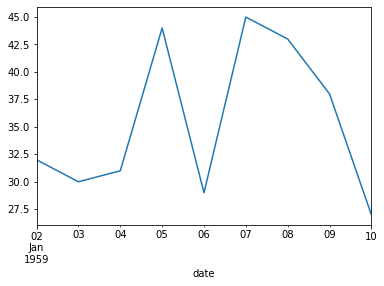

In [138]:
D_df2["births"].plot()

Now we want see a trendline from data, now we going to us seaborn library

In [139]:
import seaborn as sns

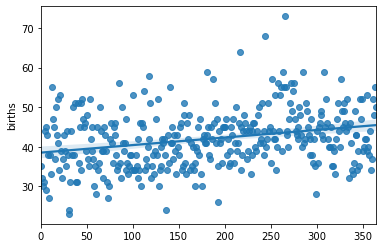

In [140]:
sns.regplot(x=BF.index.values, y=BF["births"])

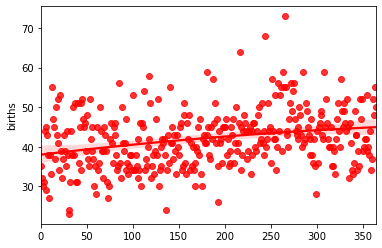

In [141]:
sns.regplot(x=BF.index.values, y=BF["births"], order = 2, color="red")

In [142]:
#Trying with other dataset
miles = pd.read_csv("D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/7. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv", header = 0, parse_dates=[0])
miles.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


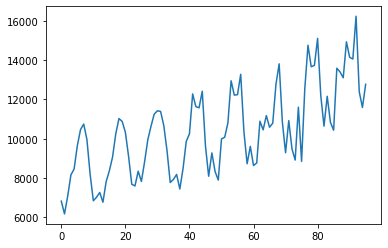

In [143]:
miles["MilesMM"].plot()

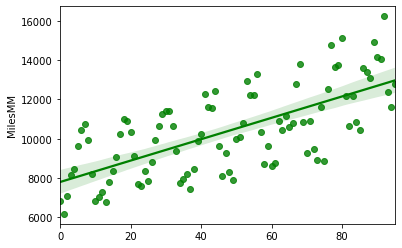

In [144]:
sns.regplot(x=miles.index.values, y= miles["MilesMM"], color = "green")

Next we want removing seasonality

In [145]:
miles["year"] = miles["Month"].dt.year
miles.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [146]:
miles.groupby("year")["MilesMM"].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

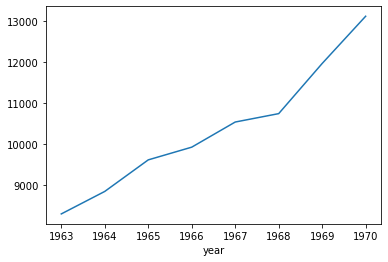

In [147]:
miles.groupby("year")["MilesMM"].mean().plot()

In [148]:
miles["lags"] = miles["MilesMM"].shift(1)
miles.head()

,Month,MilesMM,year,lags
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


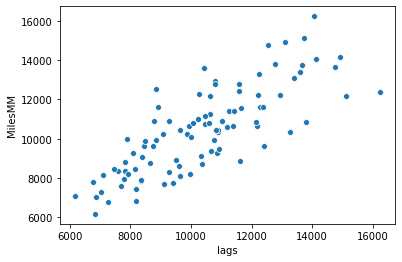

In [149]:
sns.scatterplot(x= miles["lags"], y=miles["MilesMM"])

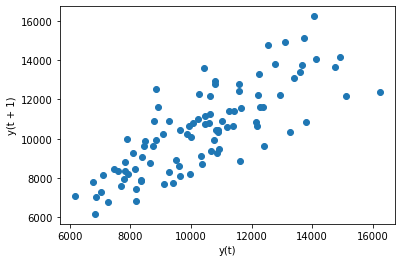

In [150]:
from pandas.plotting import lag_plot as lagp
lagp(miles["MilesMM"])

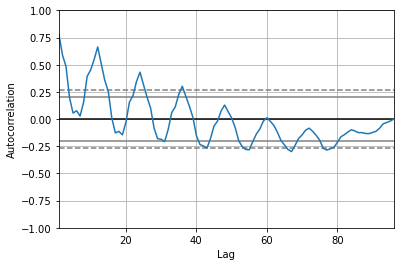

In [151]:
from pandas.plotting import autocorrelation_plot as acorr
acorr(miles["MilesMM"])

Creating Features

In [152]:
features = BF.copy()
features["year"] = BF["date"].dt.year
features["month"] =BF["date"].dt.month
features["day"] =BF["date"].dt.day
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [153]:
#Creating lag features
features["lag1"] =BF["births"].shift(1)
features["lag2"] = BF["births"].shift(365)
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


In [154]:
#Window features to observate the evolution in especified time steps
features["Roll_mean"] = BF["births"].rolling(window = 2).mean()
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [155]:
features["Roll_max"] = BF["births"].rolling(window = 3).max()
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


In [156]:
#Expanding features
features["Expand_max"] = BF["births"].expanding().max()
features.head(10)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,43.0,45.0


Downsampling and Upsampling

In [157]:
miles = pd.read_csv("D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/7. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv", header = 0, parse_dates=[0])
miles.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [158]:
#Downsampling
Qmiles = miles.resample("Q", on="Month").mean()
Qmiles.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [159]:
Ymiles = miles.resample("A", on="Month").mean()
Ymiles.head()

,MilesMM
Month,
1963-12-31,8300.250000
1964-12-31,8849.333333
1965-12-31,9619.250000
1966-12-31,9929.500000
1967-12-31,10542.916667


In [160]:
#Upsampling
Upmiles = miles.resample("D", on= "Month").mean()
Upmiles.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [161]:
interpolatedmiles= Upmiles.interpolate(method="linear")
interpolatedmiles.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


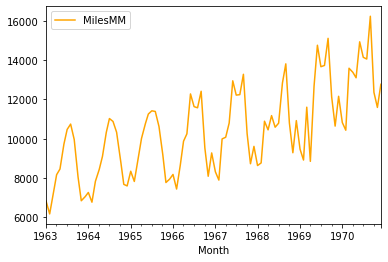

In [162]:
interpolatedmiles.plot(color="orange")

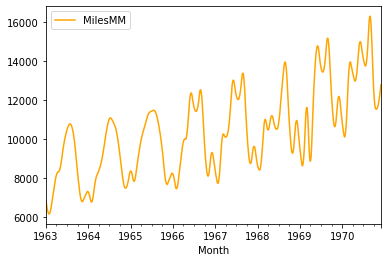

In [163]:
polyginterpolatedmiles = Upmiles.interpolate(method="spline", order = 2)
polyginterpolatedmiles.plot(color="orange")

Decomposing Times series

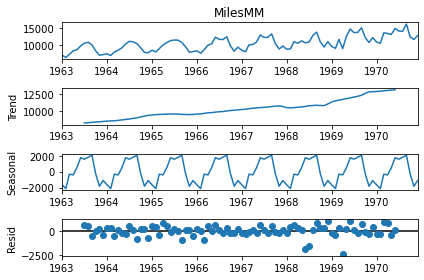

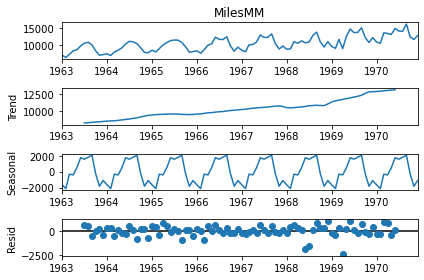

In [164]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
miles.index = miles["Month"]
result = sd(miles["MilesMM"], model = "additive")
result.plot()

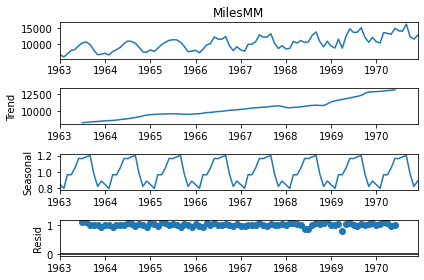

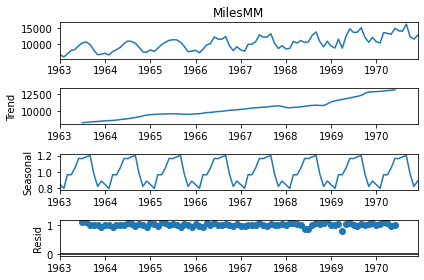

In [165]:
result2 = sd(miles["MilesMM"], model = "multiplicative")
result2.plot()

In [166]:
#Differencing
miles = pd.read_csv("D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/7. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv", header = 0, parse_dates=[0])
miles["lag1"] = miles["MilesMM"].shift(1)
miles["MilesMM_diff_1"] = miles["MilesMM"].diff(periods = 1)
miles.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


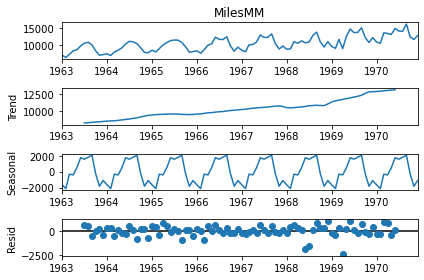

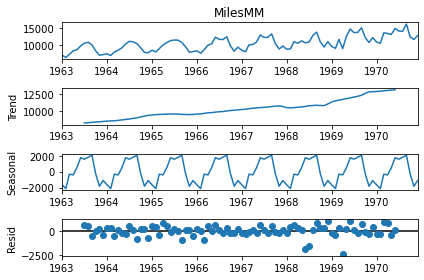

In [167]:
miles.index=miles["Month"]
resulta= sd(miles["MilesMM"], model = "additive")
resulta.plot()

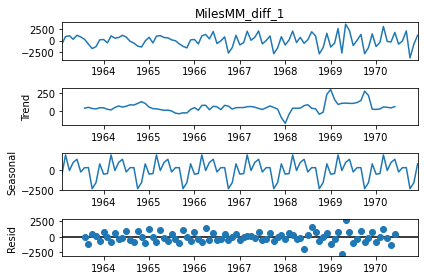

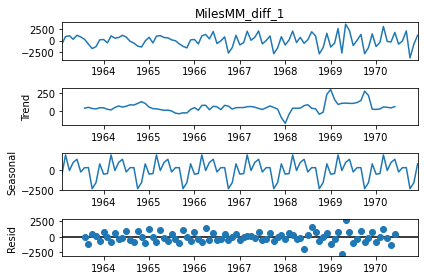

In [168]:
miles.index=miles["Month"]
resultb= sd(miles.iloc[1:, 3], model= "additive")
resultb.plot()

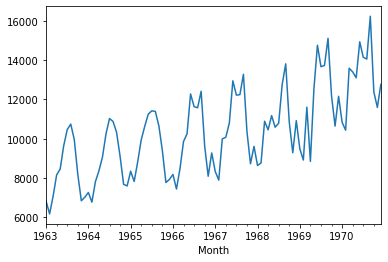

In [169]:
miles["MilesMM"].plot()

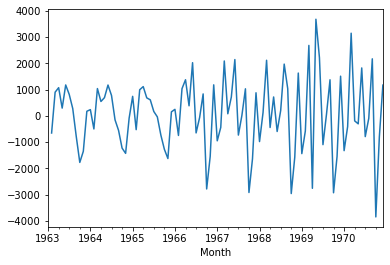

In [170]:
miles["MilesMM_diff_1"].plot()

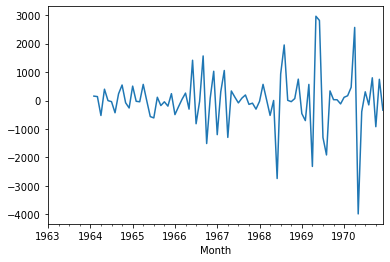

In [171]:
miles["MilesMM_diff_12"] = miles["MilesMM_diff_1"].diff(periods=12)
miles["MilesMM_diff_12"].plot()

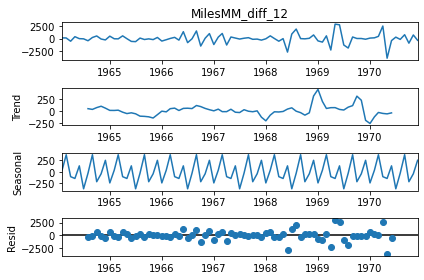

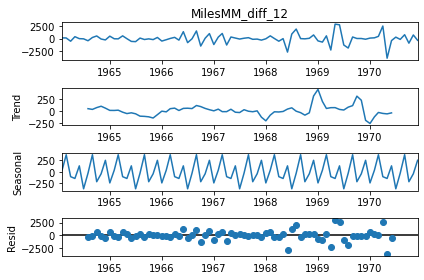

In [172]:
resultc = sd(miles.iloc[13:,4], model ="additive")
resultc.plot()